In [ ]:
from pathlib import Path
from datetime import datetime
import csv
import json
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
plt.style.use('ggplot')

Sitka Rainfall: Sitka is located in a temperate rainforest, so it gets a fair
amount of rainfall. In the data file sitka_weather_2021_full.csv is a header called
PRCP, which represents daily rainfall amounts. Make a visualization focusing on
the data in this column. You can repeat the exercise for Death Valley if you’re
curious how little rainfall occurs in a desert

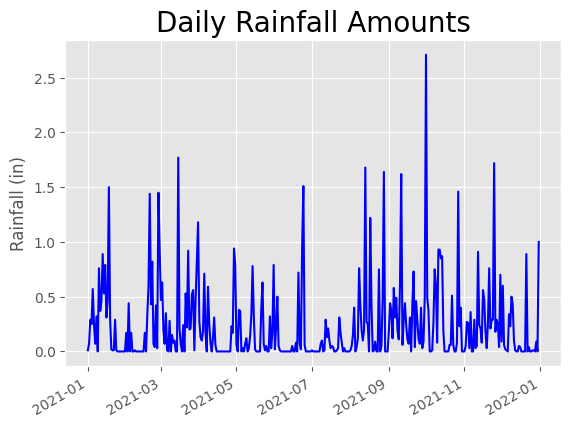

In [12]:
path = Path('weather_data/sitka_weather_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# Extract rainfall amount.
dates, rainfall_amounts = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    rainfall_amount = float(row[5])
    dates.append(current_date)
    rainfall_amounts.append(rainfall_amount)

fig, ax = plt.subplots()
ax.plot(dates, rainfall_amounts, c="blue")

ax.set_title("Daily Rainfall Amounts", fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Rainfall (in)", fontsize=12)

plt.show()

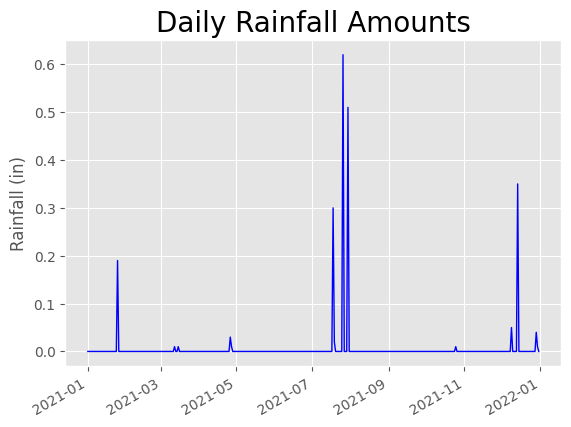

In [13]:
path = Path('weather_data/death_valley_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# Extract rainfall amount.
dates, rainfall_amounts = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    rainfall_amount = float(row[3])
    dates.append(current_date)
    rainfall_amounts.append(rainfall_amount)

fig, ax = plt.subplots()
ax.plot(dates, rainfall_amounts, c="blue", linewidth=1)

ax.set_title("Daily Rainfall Amounts", fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Rainfall (in)", fontsize=12)

plt.show()

Sitka–Death Valley Comparison: The temperature scales on the Sitka and
Death Valley graphs reflect the different data ranges. To accurately compare
the temperature range in Sitka to that of Death Valley, you need identical scales
on the y-axis. Change the settings for the y-axis on one or both of the charts in
Figures 16-5 and 16-6. Then make a direct comparison between temperature
ranges in Sitka and Death Valley (or any two places you want to compare).

Missing data for 2021-05-04 00:00:00


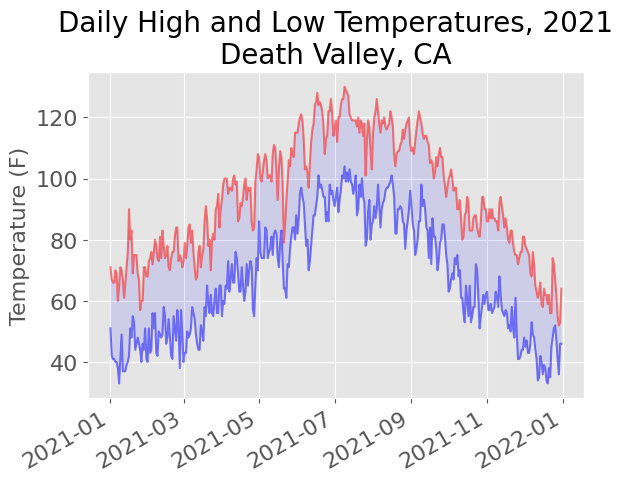

In [14]:
path = Path('weather_data/death_valley_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[6])
        low = int(row[7])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

Missing data for 2021-04-23 00:00:00


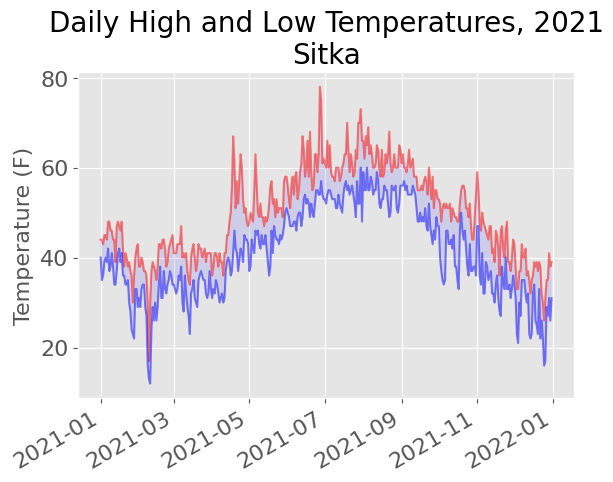

In [15]:
path = Path('weather_data/sitka_weather_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[7])
        low = int(row[8])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nSitka"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

Automatic Indexes: In this section, we hardcoded the indexes corresponding to the TMIN and TMAX columns. Use the header row to determine the indexes
for these values, so your program can work for Sitka or Death Valley. Use the station name to automatically generate an appropriate title for your graph as well.

Missing data for 2021-04-23 00:00:00


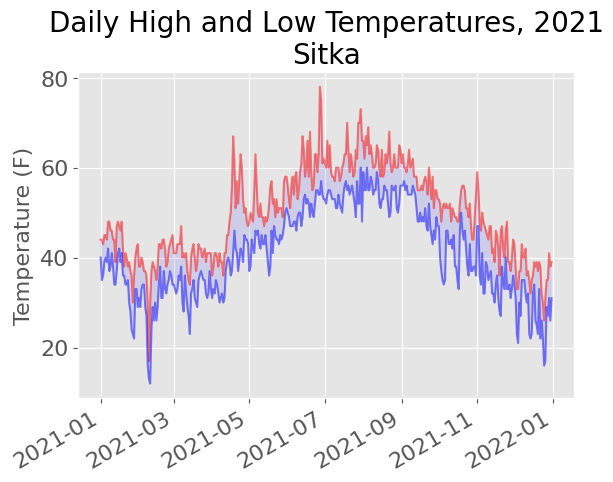

In [16]:
path = Path('weather_data/sitka_weather_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

date_index = header_row.index('DATE')
high_index = header_row.index('TMAX')
low_index = header_row.index('TMIN')

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
    try:
        high = int(row[high_index])
        low = int(row[low_index])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nSitka"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

Refactoring: The loop that pulls data from all_eq_dicts uses variables for
the magnitude, longitude, latitude, and title of each earthquake before appending these values to their appropriate lists. This approach was chosen for clarity
in how to pull data from a GeoJSON file, but it’s not necessary in your code.
Instead of using these temporary variables, pull each value from eq_dict and
append it to the appropriate list in one line. Doing so should shorten the body
of this loop to just four lines

Automated Title: In this section, we used the generic title Global
Earthquakes. Instead, you can use the title for the dataset in the metadata part
of the GeoJSON file. Pull this value and assign it to the variable title

In [22]:
path = Path('eq_data/eq_data_30_day_m1.geojson')
all_eq_data = json.loads(path.read_text())

title = all_eq_data['metadata']['title']
all_eq_dicts = all_eq_data['features']

mags, lons, lats, hover_texts = [], [], [], []
for eq_dict in all_eq_dicts:
    mags.append(eq_dict['properties']['mag'])
    lons.append(eq_dict['geometry']['coordinates'][0])
    lats.append(eq_dict['geometry']['coordinates'][1])
    hover_texts.append(eq_dict['properties']['title'])

fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
        color=mags,
        color_continuous_scale='Viridis',
        labels={'color':'Magnitude'},
        projection='natural earth',
        hover_name=hover_texts,
    )
fig.show()

Recent Earthquakes: You can find online data files containing information
about the most recent earthquakes over 1-hour, 1-day, 7-day, and 30-day periods. Go to https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php and
you’ll see a list of links to datasets for various time periods, focusing on earthquakes of different magnitudes. Download one of these datasets and create a
visualization of the most recent earthquake activity.

In [33]:
path = Path('eq_data/all_day.geojson')
all_eq_data = json.loads(path.read_text())

title = all_eq_data['metadata']['title']
all_eq_dicts = all_eq_data['features']

mags, lons, lats, hover_texts = [], [], [], []
for eq_dict in all_eq_dicts:
    mags.append(eq_dict['properties']['mag'])
    lons.append(eq_dict['geometry']['coordinates'][0])
    lats.append(eq_dict['geometry']['coordinates'][1])
    hover_texts.append(eq_dict['properties']['title'])

hover_texts

fig = px.scatter_geo(lat=lats, lon=lons, title=title,
        color=mags,
        color_continuous_scale='Viridis',
        labels={'color':'Magnitude'},
        projection='natural earth',
        hover_name=hover_texts,
    )
fig.show()

World Fires: In the resources for this chapter, you’ll find a file called
world_fires_1_day.csv. This file contains information about fires burning in different locations around the globe, including the latitude, longitude, and brightness
of each fire. Using the data-processing work from the first part of this chapter
and the mapping work from this section, make a map that shows which parts of
the world are affected by fires

In [40]:
path = Path("eq_data/world_fires_1_day.csv")
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

lons, lats, brightnesses = [], [], []
for row in reader:
    try:
        brightness = float(row[2])
        lon = float(row[1])
        lat = float(row[0])
    except ValueError:
        print("Error")
    else:
        brightnesses.append(brightness)
        lons.append(lon)
        lats.append(lat)

fig = px.scatter_geo(lat=lats, lon=lons, title="World Fires",
        color=brightnesses,
        color_continuous_scale='Reds',
        labels={'color':'Brightness'},
        projection='natural earth',
    )
fig.show()